<a href="https://colab.research.google.com/github/anacgfp/Computacao-Natural/blob/master/evolucao_diferencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import matplotlib.pyplot as plt
import random

In [ ]:
#Código aproveitado da monitoria :)
import sys
import math

# Função que calcula o valor da função objetivo
def valor_objetivo(cromossomo):
    total = 0
    for i in range (len(cromossomo)):
        total += (cromossomo[i]**2 - 10* math.cos(2 * (math.pi) * cromossomo[i]) + 10)
    return total


# Função que calcula a aptidão de uma solução (fitness)
#qnto mais proximo de zero, melhor
def aptidao(cromossomo):
    temp = valor_objetivo(cromossomo)
    if temp == 0:
        return sys.maxsize
    else:
        return 1 / temp 

In [ ]:
#GERANDO OS INDIVIDUOS
def gerar_individuo():
  return [random.randint(-30, 30) for _ in range(0, D)] #parte aproveitada do código da monitoria

#INICIALIZANDO A POP 
def init_pop():
  pop = []
  for _ in range(TAM_POP):
    aux = gerar_individuo()
    pop.append(aux)
  return pop


#FUNCAO QUE RETORNA O MELHOR INDIVIDUO
def get_best(pop):
  best = pop[0]
  for i in range(TAM_POP):
    if aptidao(pop[i]) > aptidao(best):
      best = pop[i]
  return best

In [ ]:
#MUTACAO 
def mutacao(ind_1, ind_2, ind_3, F):
    novo_cromossomo = [ind_1[i] + F * (ind_3[i] - ind_2[i]) for i in range(0, len(ind_1))]        
    return novo_cromossomo

In [ ]:
#CROSSOVER
def cruzamento(ind_mutante, ind_original, CR):
  resultado = []
  i = 0
  while i < len(ind_mutante):
    r = random.random()
    if r <= CR:
      resultado.append(ind_mutante[i])
    else:
      resultado.append(ind_original[i])
    i += 1

  return resultado


In [ ]:
#codigo reutilizado da monitoria :)
def gerar_descendente(ind_1, ind_2, ind_3, ind_original, F, CR):
    mutante = mutacao(ind_1,ind_2,ind_3, F)
    novo_ind = cruzamento(mutante, ind_original, CR)
    return novo_ind

def reproducao(populacao, F, CR):
  descendentes = []
  aux = []
  #gera os descendentes
  for i in range(0, TAM_POP):
    [ind_1, ind_2, ind_3] = random.choices(populacao, k=3) #escolha aleatória
    desc = gerar_descendente(ind_1, ind_2,ind_3,populacao[i], F, CR)
    aux.append(desc)

  #operador guloso

  for i in range(0, TAM_POP):
    if aptidao(populacao[i]) > aptidao(aux[i]):
      descendentes.append(populacao[i])
    else:
      descendentes.append(aux[i])
  return descendentes

In [ ]:
def plotar_grafico(fitness, F, CR):
  x = []
  y = []
  for i in range(len(fitness)):
    x.append(i)
    y.append(fitness[i])
  plt.plot(x, y)
  plt.title('Gráf. de Convergência: F: ' + str(F) + ' CR: ' + str(CR))
  plt.show()

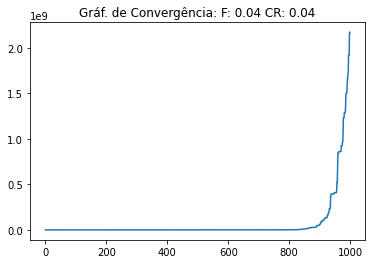

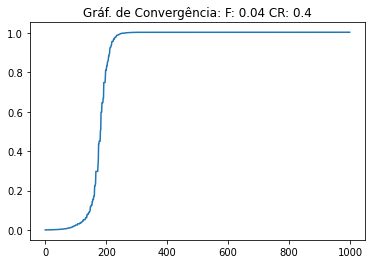

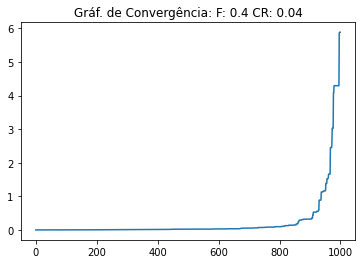

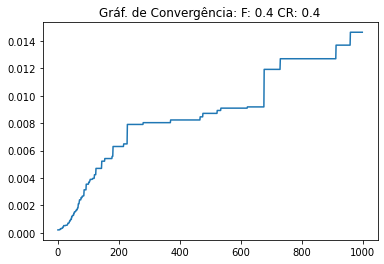

best fitness:  2172193274.559202  f:  0.04  cr:  0.04
media:  2172193281.464855  
[-8.998806379957198e-07, -1.2518241553311988e-07, 8.799070885669083e-08, -4.346505545958748e-07, -1.077682715962828e-07, 3.5895763499377937e-07, 2.2599081685670524e-07, 4.486849379061391e-07, -1.763595872834062e-07, -2.6577436613686585e-07, 1.8978220307227345e-07, 1.5579557385542566e-08, -4.6866158212838464e-08, 1.2730217683930672e-07, 1.8937734623191646e-07, 2.116209550533776e-07, 3.067662094901341e-08, -2.6420692951654873e-07, 1.734346381585327e-07, -3.126311700051421e-07, 2.7979435644776043e-07, 1.2379340284036532e-07, 5.02617005860805e-07, -1.0129903493773604e-07, 1.3170331408445172e-07, -2.530487013406619e-07, -8.79718973403291e-08, 2.4011529531795235e-08, -1.3830779146118073e-07, -6.759576240401783e-08]


In [ ]:
def de(F = 0.5, CR = 0.5):
  lista_de_fitness = []
  pop = init_pop()
  best = get_best(pop)
  for i in range(GERACOES):
    melhor_pop = get_best(pop)
    if aptidao(melhor_pop) > aptidao(best):
      best = melhor_pop
    aux = reproducao(pop, F, CR)
    pop = aux
    lista_de_fitness.append(aptidao(best))
    # print('Geração: ', i, ' - melhor objt: ', aptidao(best))
  
  plotar_grafico(lista_de_fitness, F, CR)
  return best

#----------------------------
TAM_POP = 300
GERACOES = 1000
D = 30
#----------------------------

def teste(n = 1):

  f_list = [0.04, 0.4]
  cr_list = [0.04, 0.4]
  best_combinacao = [-1, -1]
  soma = 0
  i = 0
  while i < n:
    pop = init_pop()
    best = get_best(pop)
    best_fit = aptidao(best)
    for f in f_list:
      for cr in cr_list:
        aux = de(F = f, CR = cr)
        aux_fit = aptidao(aux)
        soma += aux_fit
        if aux_fit > best_fit:
          best = aux
          best_fit = aux_fit
          best_combinacao[0], best_combinacao[1] = f, cr
    i += 1
  print('best fitness: ',best_fit, ' f: ', best_combinacao[0], ' cr: ', best_combinacao[1] )
  print('media: ', soma/n, ' ')
  print(best)
  return best

b = teste()